# Modeling water balance


The soil water balance at the daily time scale can be modeled as

$$n Z_r \dfrac{ds}{dt} = R - I - Q - ET - L$$

where $n Z_r$ is the water storage capacity, $R$ is the rain, $I$ is the canopy interception, $Q$ is the runoff, $ET$ is the evapotranspiration, and $L$ is the deep drainage (leakage).

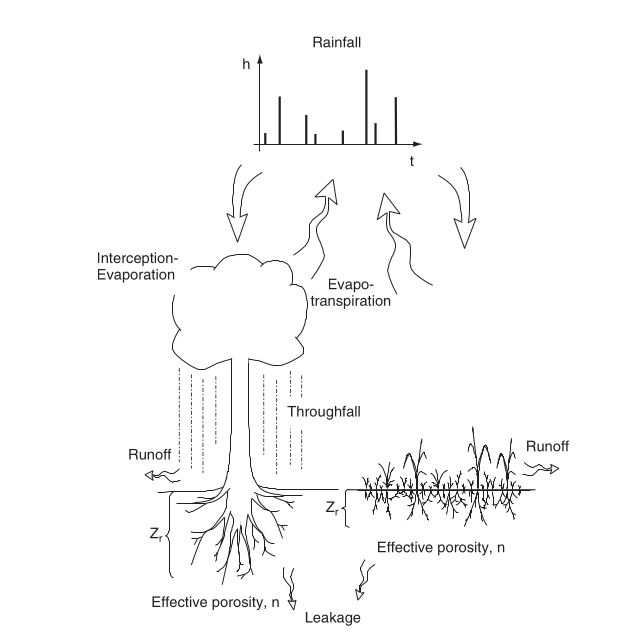

## Rainfall

### Poisson process

The distribution of rain events is exponential with mean $1/\lambda$:

$$f_{T}(\tau) = \lambda e^{-\lambda \tau}$$

for $\tau \geq 0$.

The depth of rain events is assumed to be an independent random variable $h$, described by an exponential proprability density function:

$$f_H(h) = \frac{1}{\alpha} e^{-\frac{1}{\alpha}h}$$

for $h \geq 0$, where $\alpha$ is the mean depth of rain events.


$$ h =  -\alpha \cdot \log(1-\rm{CDF})$$

CDF is a random uniform number.

## Canopy interception

During the rain events, a part of the water can be retained in the vegetation canopy, drips throughout the trunk, or evaporates.
Modeling the canopy interception is complex and depends on canopy structure, rain intensity.


$$I(R) = 
    \begin{cases}
        R, & R \leq R^{*} \\
        R^{*}, & R > R^{*}
    \end{cases}
$$


## Runoff

Consider runoff when the soil gets saturated and still rains.

## Evapotranspiration

The amount of water transferred from the soil to the atmosphere, which considers the evaporation from the soil and the transpiration of the plants.

$$ET(s) = 
    \begin{cases}
        0 & s \leq s_h \\
        E_w \cdot \dfrac{s - s_h}{s_w - s_h}, & s_h < s \leq s_w \\
        E_w + (E_{max} - E_w) \cdot \dfrac{s - s_w}{s^* - s_w}, & s_w < s \leq s^*\\
        E_{max}, & s^* < s
    \end{cases}
$$

## Leakage

Amount of water lost due to the gravity at the lowest boundary.

$$L(s) = K_s s^b$$

When the soil moisture reaches the field capacity ($s_{fc}$), the leakage is negligible, and we can consider it equal to zero.

## Soil water balance

Combine all components.

1. Take the rain amount (even if it is zero);
2. Compute the canopy interception;
3. Compute the soil moisture for a given input of water;
4. Check/compute the runoff;
5. Compute the evapotranspiration and leakage for resulting soil moisture;
6. Subtract the water losses ($ET$ and $Lk$) from the soil moisture;
7. Compute the resulting soil moisture.

### A tip for more efficient programming

- If we need to run a piece of code multiple times, it will be more efficient to create a function and call the function when we need it.
- In our case, we need to run the soil water balance model and compute the values to the daily timescale.

# A study case

Let's run the water balance model with data and compare the soil moisture modeled with the observed.

We will also compute the water fluxes for different soil textural classes and compare the water partitioning.

Table: Parameters describing various soil characteristics for four different soil textures. Source: [Laio et al. (2001)](https://doi.org/10.1016/S0309-1708(01)00005-7).

|Class      |$b$  |$K_s$ (cm d$^{-1}$)|$n$|$s_h$|$s_w$|$s^{*}$|$s_{fc}$
|-----------|-----|-----|-----|----|----|----|----|
|Sand       |4.05 |>200 |0.35 |0.08|0.11|0.33|0.35|
|Loamy sand |4.38 |100  |0.42 |0.08|0.11|0.31|0.52|
|Sandy loam |4.90 |80   |0.43 |0.14|0.18|0.46|0.56|
|Loam       |5.39 | 20  |0.45 |0.19|0.24|0.57|0.65|
|Clay       |11.4 | < 10|0.50 |0.47|0.52|0.78|$\approx 1$|





# Tasks

- Run the model for different soil textural classes;
- Simulate the water balance considering $\pm 25\%$ in rainfall;
- Compute the water partitioning for each soil and rainfall condition.